In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
pd.set_option('display.max_columns', None)
final_depression = pd.read_csv('data_train_depr.csv')
final_anxiety = pd.read_csv('data_train_anx.csv')
final_stress = pd.read_csv('data_train_str.csv')

display(final_depression, final_anxiety, final_stress)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,0,0,0,0,0,1,1,0,0,0,1,0,0,2,5,2,2,3,6,3,7,7,6,3,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3,3,2,2,29,1,1,10,1,10,1,1,4,3,0
1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,0,0,0,1,0,2,0,5,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,3,1,2,2,21,1,1,10,4,10,2,1,5,2,1
2,1,2,0,2,3,3,2,3,2,2,3,0,2,3,5,6,6,5,7,2,3,4,2,2,0,1,1,1,1,0,0,0,0,1,0,0,0,1,1,1,3,3,2,2,19,1,1,10,1,10,2,1,5,2,2
3,0,0,0,0,2,0,0,1,1,0,0,0,0,0,7,3,2,3,5,3,6,5,4,5,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,3,0,1,13,1,2,7,1,60,2,1,3,1,0
4,1,2,1,1,1,2,2,0,2,1,1,1,0,3,2,3,2,3,3,2,2,3,1,2,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,1,2,2,17,1,1,0,0,10,2,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,3,2,3,1,3,1,3,2,2,3,2,1,2,1,2,1,6,3,7,5,3,2,3,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,2,2,19,2,1,1,1,60,2,1,2,2,2
16796,2,3,3,2,2,0,1,3,2,2,0,3,1,3,7,2,5,6,4,3,2,6,2,7,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,1,4,3,1,1,30,1,1,12,1,60,1,2,2,3,2
16797,1,2,2,2,1,2,2,2,3,2,1,0,2,2,4,1,7,7,5,7,7,1,5,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,3,2,2,2,23,2,1,10,4,10,2,1,5,3,2
16798,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,5,2,7,5,5,6,3,1,2,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,17,2,1,2,2,60,2,1,4,2,2


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,1,2,1,0,0,1,1,3,1,0,0,2,0,4,3,5,5,6,6,3,5,2,2,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,1,2,2,1,1,18,2,1,1,1,60,2,1,3,2,1
1,3,0,0,1,0,1,0,0,2,1,1,0,3,0,1,6,4,7,2,6,4,4,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,1,2,2,33,1,1,8,1,10,1,2,4,3,0
2,1,1,1,2,0,1,1,1,1,1,1,2,1,1,6,5,7,5,5,6,5,4,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,2,2,24,1,1,10,1,10,2,1,2,3,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,6,1,6,5,3,1,6,4,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,3,3,2,0,19,1,1,10,0,10,0,1,4,2,0
4,3,1,0,2,0,0,3,0,1,0,3,3,3,3,1,7,1,7,1,7,4,7,1,4,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,3,2,2,2,20,1,1,10,1,10,2,1,7,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,0,1,2,3,0,1,2,0,0,0,1,0,2,2,3,3,6,6,5,6,7,2,4,4,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3,1,2,2,22,2,1,10,4,10,2,1,6,3,1
16796,3,1,3,3,0,1,3,0,3,3,1,1,3,1,5,7,4,7,7,7,7,1,4,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,3,1,2,2,23,2,1,10,1,70,2,1,2,3,2
16797,2,2,1,1,1,1,1,0,0,2,2,2,1,1,4,5,7,7,4,6,6,6,4,7,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,2,1,2,1,18,1,1,10,0,70,2,1,5,2,1
16798,3,2,3,3,1,3,1,0,0,2,3,1,3,2,6,7,5,7,6,5,5,4,3,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,4,3,2,2,27,1,1,10,5,70,2,1,5,3,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,2,3,3,2,2,2,2,1,3,2,2,2,2,3,4,5,7,6,6,7,7,5,7,6,1,1,0,1,1,0,1,0,0,1,0,0,0,1,1,1,3,3,2,1,22,1,1,10,0,70,2,1,3,3,2
1,2,3,3,3,1,1,1,2,2,3,1,1,1,1,6,5,3,6,6,1,5,6,2,2,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,2,3,2,2,20,1,1,6,1,60,1,1,2,2,2
2,1,1,2,1,1,0,1,0,1,3,0,1,0,1,1,1,7,5,4,7,6,5,5,4,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3,3,1,1,42,2,2,7,3,60,2,2,2,4,0
3,1,1,2,1,1,1,1,1,1,1,1,1,0,1,6,4,5,3,3,2,7,1,7,5,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3,3,2,1,22,1,1,6,1,10,2,1,3,3,1
4,0,1,1,1,3,0,3,2,1,2,2,2,3,2,1,6,5,5,1,7,1,2,1,3,1,1,0,1,1,0,1,0,0,1,0,1,1,1,1,0,2,3,1,1,15,2,1,2,2,10,2,1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,0,1,1,2,2,1,1,1,2,0,2,1,1,3,2,3,7,7,6,6,6,3,6,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,3,1,1,22,2,1,1,1,60,2,1,2,3,1
16796,1,0,0,1,0,2,1,0,2,1,1,1,1,1,1,5,6,2,7,5,6,2,5,6,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,3,2,2,2,25,2,1,10,0,10,1,1,4,3,0
16797,1,2,3,1,2,1,2,0,2,0,0,2,0,1,4,1,5,5,5,7,2,4,2,5,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,3,1,2,22,2,1,0,1,60,1,1,2,3,1
16798,0,1,1,1,1,2,1,2,1,0,0,2,0,2,4,5,5,5,3,6,5,4,5,3,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,2,3,2,2,20,1,1,1,2,60,1,1,0,2,1


In [3]:
X_Depression = final_depression.iloc[:,0:54].values
y_Depression = final_depression.iloc[:,-1:].values

X_Anxiety = final_anxiety.iloc[:,0:54].values
y_Anxiety = final_anxiety.iloc[:,-1:].values

X_Stress = final_stress.iloc[:,0:54].values
y_Stress = final_stress.iloc[:,-1:].values

print(X_Depression)
print(y_Depression)

print(X_Anxiety)
print(y_Anxiety)

print(X_Stress)
print(y_Stress)

[[0 0 0 ... 1 4 3]
 [1 1 1 ... 1 5 2]
 [1 2 0 ... 1 5 2]
 ...
 [1 2 2 ... 1 5 3]
 [3 3 3 ... 1 4 2]
 [0 3 3 ... 1 4 2]]
[[0]
 [1]
 [2]
 ...
 [2]
 [2]
 [2]]
[[3 1 2 ... 1 3 2]
 [3 0 0 ... 2 4 3]
 [1 1 1 ... 1 2 3]
 ...
 [2 2 1 ... 1 5 2]
 [3 2 3 ... 1 5 3]
 [0 1 1 ... 1 3 2]]
[[1]
 [0]
 [1]
 ...
 [1]
 [2]
 [1]]
[[2 3 3 ... 1 3 3]
 [2 3 3 ... 1 2 2]
 [1 1 2 ... 2 2 4]
 ...
 [1 2 3 ... 1 2 3]
 [0 1 1 ... 1 0 2]
 [1 1 1 ... 2 1 3]]
[[2]
 [2]
 [0]
 ...
 [1]
 [1]
 [0]]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

scaler=MinMaxScaler()

X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X_Depression, y_Depression, test_size=0.3, random_state=0)
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_Anxiety, y_Anxiety, test_size=0.3, random_state=0)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X_Stress, y_Stress, test_size=0.3, random_state=0)

X_train_depression = scaler.fit_transform(X_train_depression)
X_test_depression = scaler.transform(X_test_depression)
X_train_anxiety = scaler.fit_transform(X_train_anxiety)
X_test_anxiety = scaler.transform(X_test_anxiety)
X_train_stress = scaler.fit_transform(X_train_stress)
X_test_stress = scaler.transform(X_test_stress)

print(y_train_depression.shape,y_test_depression.shape,X_train_depression.shape,X_test_depression.shape)
print(y_train_anxiety.shape,y_test_anxiety.shape,X_train_anxiety.shape,X_test_anxiety.shape)
print(y_train_stress.shape,y_test_stress.shape,X_train_stress.shape,X_test_stress.shape)

(11760, 1) (5040, 1) (11760, 54) (5040, 54)
(11760, 1) (5040, 1) (11760, 54) (5040, 54)
(11760, 1) (5040, 1) (11760, 54) (5040, 54)


In [5]:
model = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(14,)),
    tf.keras.layers.Dense(512, activation = 'relu',input_shape=(54,), name ="Input"), #input_shape=[15]
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(7, activation='softmax', name="layer3")
    tf.keras.layers.Dense(3, activation='softmax', name="Condition")
  ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 512)               28160     
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 Condition (Dense)           (None, 3)                 771       
                                                                 
Total params: 160,259
Trainable params: 160,259
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     #SparseCategoricalCrossentropy
              metrics=['accuracy'])

historydep = model.fit(X_train_depression, y_train_depression, batch_size=32, epochs=100)
model.save("depression_model.h5")

historyanx = model.fit(X_train_anxiety, y_train_anxiety, batch_size=32, epochs=100)
model.save("anxiety_model.h5")

historystr = model.fit(X_train_stress, y_train_stress, batch_size=32, epochs=100)
model.save("stress_model.h5")

Epoch 1/100


C:\Users\muham\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


368/368 [==============================] - 2s 3ms/step - loss: 0.1898 - accuracy: 0.9238
Epoch 2/100
368/368 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9543
Epoch 3/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9601
Epoch 4/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9660
Epoch 5/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9753
Epoch 6/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0636 - accuracy: 0.9747
Epoch 7/100
368/368 [==============================] - 2s 4ms/step - loss: 0.0526 - accuracy: 0.9794
Epoch 8/100
368/368 [==============================] - 2s 5ms/step - loss: 0.0533 - accuracy: 0.9787
Epoch 9/100
368/368 [==============================] - 2s 4ms/step - loss: 0.0431 - accuracy: 0.9821
Epoch 10/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9793
E

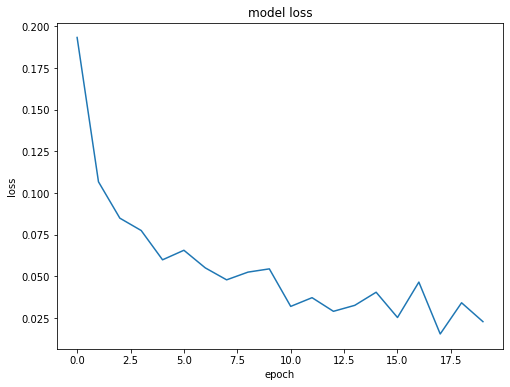

In [7]:
from matplotlib.pyplot import figure

figure(figsize = (8,6))
plt.plot(historydep.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
depression_validation = pd.read_csv('data_valid_depr.csv')
anxiety_validation = pd.read_csv('data_valid_anx.csv')
stress_validation = pd.read_csv('data_valid_str.csv')

display(depression_validation, anxiety_validation, stress_validation)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,2,3,3,3,3,3,3,3,3,3,3,6,5,7,5,6,7,7,0,1,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,18,1,1,2,2,20,2,1,3,2,2
1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,4,5,6,3,5,2,4,4,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,3,2,2,19,1,1,10,1,10,2,1,2,2,0
2,1,1,2,1,1,1,1,1,2,1,2,1,1,1,4,5,6,6,6,5,5,3,2,4,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,2,3,2,1,19,2,1,8,2,10,2,1,2,2,1
3,1,1,2,1,1,0,0,1,2,2,0,0,0,2,6,3,5,7,5,6,7,5,2,5,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,2,3,2,2,21,2,1,10,1,10,1,1,2,2,0
4,2,2,2,3,2,1,2,3,2,1,3,0,1,1,4,5,6,5,7,5,6,7,4,6,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,3,2,2,16,1,0,10,1,10,2,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,1,2,1,1,1,1,1,1,2,1,3,1,1,2,1,4,7,5,5,7,5,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,36,1,3,7,0,70,2,2,3,4,1
4196,0,3,0,0,3,0,0,3,0,3,0,0,0,3,5,5,1,1,7,3,1,7,7,4,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,3,1,1,17,2,1,7,1,30,2,1,3,2,1
4197,2,3,3,2,3,2,2,3,3,2,1,3,2,3,5,5,1,5,6,5,5,7,5,6,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,3,2,1,1,44,2,1,1,1,60,2,1,4,4,2
4198,1,0,0,0,0,0,0,0,0,1,0,0,0,1,6,1,3,7,4,2,6,5,3,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,3,2,2,16,1,1,10,1,10,2,1,2,1,0


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,0,1,3,3,3,3,2,1,1,3,0,2,3,1,7,4,5,7,7,5,7,5,3,1,1,1,0,1,1,0,0,0,1,1,0,0,1,0,1,1,2,2,2,1,19,2,1,12,1,60,1,1,4,2,2
1,1,0,0,3,1,0,3,0,2,1,3,3,1,0,3,5,5,4,6,7,7,4,4,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,2,2,25,1,1,10,1,10,2,1,4,3,1
2,0,0,1,0,1,0,1,1,0,1,2,1,0,0,7,4,4,5,6,5,7,4,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,2,21,1,2,10,1,10,2,1,4,2,0
3,3,1,0,3,0,1,0,0,2,1,0,1,1,1,2,7,4,5,6,5,1,6,2,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,1,3,1,1,2,25,1,1,1,1,10,1,1,2,3,1
4,1,1,0,1,1,1,1,0,2,1,2,1,0,1,3,5,5,5,6,5,5,3,2,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,3,2,2,27,2,2,12,3,60,2,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,3,3,3,1,1,3,3,2,3,3,3,3,3,6,7,5,7,5,5,5,7,1,2,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,1,2,2,19,2,1,12,5,70,1,1,2,2,2
4196,1,0,2,3,1,3,0,0,3,0,2,0,3,2,1,6,6,7,2,6,3,7,2,2,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,3,2,1,14,1,1,2,2,70,2,1,4,1,1
4197,1,0,0,1,0,0,0,0,1,0,0,1,0,0,5,2,6,5,5,5,6,2,6,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3,3,2,1,36,2,1,7,1,60,1,2,1,4,0
4198,1,1,0,1,0,0,1,1,0,0,0,0,1,0,4,1,6,5,6,4,1,2,5,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,3,2,2,30,1,1,10,1,10,2,2,6,3,0


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,4,4,7,5,6,6,6,2,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,2,2,2,18,2,1,1,2,60,1,1,1,2,2
1,0,0,1,1,1,0,0,1,0,0,0,2,0,0,1,1,7,2,3,6,7,1,6,7,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,4,1,1,2,80,1,1,10,1,70,2,3,6,5,0
2,1,2,2,2,1,2,3,1,3,3,1,1,0,2,6,5,7,6,6,5,5,7,5,2,0,1,1,0,1,0,1,0,1,1,1,0,1,1,0,1,2,1,2,2,20,1,1,10,0,10,2,3,2,2,2
3,2,3,0,3,3,1,2,3,3,3,1,3,3,3,4,5,3,7,6,4,5,1,5,3,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,3,3,2,2,21,1,1,10,2,10,2,1,6,2,2
4,1,1,1,0,2,0,0,0,1,1,1,1,1,0,4,3,3,5,5,5,4,6,6,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,2,2,2,21,1,1,10,0,10,2,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,0,3,0,3,0,1,0,3,0,1,1,3,0,5,1,5,1,7,4,3,4,7,1,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,3,1,1,15,2,2,1,1,60,2,1,2,1,1
4196,3,2,3,2,2,2,0,2,3,2,0,2,1,3,3,5,2,7,5,7,6,5,6,6,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4,1,2,2,20,2,1,4,2,70,1,1,3,2,2
4197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,7,1,5,6,5,5,7,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,2,1,1,1,19,1,1,10,1,10,2,1,6,2,0
4198,2,1,3,1,1,0,2,0,2,2,2,1,2,1,2,2,3,4,5,7,7,5,6,1,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,2,1,1,20,2,1,0,1,10,2,1,2,2,1


In [27]:
index=2
X_hasil_depression = depression_validation.copy()
X_hasil_depression=X_hasil_depression = X_hasil_depression.iloc[:,0:54]#.values
X_hasil_depression=X_hasil_depression.loc[index].values
X_hasil_depression=np.array(X_hasil_depression).astype('float32').reshape((1,-1))
print(X_hasil_depression, depression_validation.loc[index,["Condition"]])

X_hasil_anxiety = anxiety_validation.copy()
X_hasil_anxiety=X_hasil_anxiety = X_hasil_anxiety.iloc[:,0:54]#.values
X_hasil_anxiety=X_hasil_anxiety.loc[index].values
X_hasil_anxiety=np.array(X_hasil_anxiety).astype('float32').reshape((1,-1))
print(X_hasil_anxiety, anxiety_validation.loc[index,["Condition"]])

X_hasil_stress = stress_validation.copy()
X_hasil_stress=X_hasil_stress = X_hasil_stress.iloc[:,0:54]#.values
X_hasil_stress=X_hasil_stress.loc[index].values
X_hasil_stress=np.array(X_hasil_stress).astype('float32').reshape((1,-1))
print(X_hasil_stress, stress_validation.loc[index,["Condition"]])

[[ 1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  2.  1.  1.  1.  4.  5.  6.  6.
   6.  5.  5.  3.  2.  4.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.
   1.  1.  1.  1.  2.  3.  2.  1. 19.  2.  1.  8.  2. 10.  2.  1.  2.  2.]] Condition    1
Name: 2, dtype: int64
[[ 0.  0.  1.  0.  1.  0.  1.  1.  0.  1.  2.  1.  0.  0.  7.  4.  4.  5.
   6.  5.  7.  4.  6.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  3.  1.  2.  2. 21.  1.  2. 10.  1. 10.  2.  1.  4.  2.]] Condition    0
Name: 2, dtype: int64
[[ 1.  2.  2.  2.  1.  2.  3.  1.  3.  3.  1.  1.  0.  2.  6.  5.  7.  6.
   6.  5.  5.  7.  5.  2.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.
   1.  1.  0.  1.  2.  1.  2.  2. 20.  1.  1. 10.  0. 10.  2.  3.  2.  2.]] Condition    2
Name: 2, dtype: int64


In [28]:
hasil_akhir_depression = model.predict(X_hasil_depression)
hasil_akhir_anxiety = model.predict(X_hasil_anxiety)
hasil_akhir_stress = model.predict(X_hasil_stress)

print('Tingkat depresi: ',hasil_akhir_stress)
print('Tingkat depresi: ',np.argmax(hasil_akhir_depression))
print('Tingkat anxiety: ',np.argmax(hasil_akhir_anxiety))
print('Tingkat stress: ',np.argmax(hasil_akhir_stress))

1/1 [==============================] - 0s 29ms/step
Tingkat depresi:  [[0. 0. 1.]]
Tingkat depresi:  2
Tingkat anxiety:  1
Tingkat stress:  2
